##Predict Property Inspection based on real-life data from Liberty Mutual Group Data Set

**Liberty Mutual Group** is an American global insurer, the third-largest property and casualty insurer in the United States. It provides a wide range of insurance products and services.

To ensure that Liberty Mutual’s portfolio of home insurance policies aligns with their business goals, many newly insured properties receive a home inspection. These inspections review the condition of key attributes of the property, including things like the foundation, roof, windows and siding. The results of an inspection help Liberty Mutual determine if the property is one they want to insure.

The callenge is to predict a transformed count of hazards or pre-existing damages using a dataset of property information. This will enable Liberty Mutual to more accurately identify high risk homes that require additional examination to confirm their insurability.

The method we will use to predict the hazard number is called a **Regression**.
Regression algorithm is one of the most common types of machine learning models. It refers to the estimation of a continuous dependent variable or response from a list of input variables, called *Features*. There are a variety of regression techniques, ranging from the simplest (linear regression) to more complex techniques including gradient boosting and neural networks. 


In this example, we will use the following algorithm: 
* Random Forest 



###Acknowledgements:
The used dataset comes from **kaggle.com**, a well-known platform for AI Challenges.

###Run the example
Please proceed as the following:
*  Download the *train.csv* and the *test.csv* files from kaggle.com with the following URL: https://www.kaggle.com/c/liberty-mutual-group-property-inspection-prediction/data
*  Rename them *'Liberty Mutual Group-Property Inspection Prediction **Train**.csv'* and *'Liberty Mutual Group-Property Inspection Prediction **Test**.csv'*
*  Select the 'Execute All' menu item
*  Upload the files by clicking on the 'Upload File' button






###Data Set

Please ensure that you have downloaded the train.csv and the test.csv files from kaggle.com. (See 'Run the example' section)

This CSV file has the following columns:

In [0]:
cols_train = [ 'Id','Hazard','T1_V1','T1_V2','T1_V3','T1_V4','T1_V5','T1_V6','T1_V7','T1_V8','T1_V9','T1_V10','T1_V11','T1_V12','T1_V13','T1_V14','T1_V15','T1_V16','T1_V17','T2_V1','T2_V2','T2_V3','T2_V4','T2_V5','T2_V6','T2_V7','T2_V8','T2_V9','T2_V10','T2_V11','T2_V12','T2_V13','T2_V14','T2_V15']
cols_test = [ 'Id','T1_V1','T1_V2','T1_V3','T1_V4','T1_V5','T1_V6','T1_V7','T1_V8','T1_V9','T1_V10','T1_V11','T1_V12','T1_V13','T1_V14','T1_V15','T1_V16','T1_V17','T2_V1','T2_V2','T2_V3','T2_V4','T2_V5','T2_V6','T2_V7','T2_V8','T2_V9','T2_V10','T2_V11','T2_V12','T2_V13','T2_V14','T2_V15']

Each row in the dataset corresponds to a property that was inspected and given a **hazard** score ("Hazard"). We can consider the the hazard score as a continuous number that represents the **condition of the property as determined by the inspection**. Some inspection hazards are major and contribute more to the total score, while some are minor and contribute less. The total score for a property is the sum of the individual hazards.
The idea is to **forecast the hazard score** based on anonymized variables which are available before an inspection is ordered.
From the AI point of view, the 'Hazard' column' is considered as the *Label*. The rest are *Features*. Most of *Features* are considered as *Categorical*.(binary or short list of values)

In [0]:
categoricals = [ 'T1_V3','T1_V4','T1_V5','T1_V6','T1_V7','T1_V8','T1_V9','T1_V10','T1_V11','T1_V12','T1_V13','T1_V14','T1_V15','T1_V16','T1_V17','T2_V1','T2_V3','T2_V4','T2_V5','T2_V6','T2_V8','T2_V9','T2_V10','T2_V11','T2_V12','T2_V13','T2_V14','T2_V15']

Upload the training file (Liberty Mutual Group-Property Inspection Prediction Train.csv) by clicking on the upload button.


In [3]:
import pandas as pd
import numpy as np
import io

from google.colab import files
uploaded = files.upload()

train_file = pd.read_csv(io.StringIO(uploaded['Liberty Mutual Group-Property Inspection Prediction Train.csv'].decode('utf-8')), usecols = cols_train)
# Display the uploaded file
train_file

Saving Liberty Mutual Group-Property Inspection Prediction Train.csv to Liberty Mutual Group-Property Inspection Prediction Train.csv


Id  Hazard  T1_V1  T1_V2  T1_V3  ... T2_V11 T2_V12 T2_V13 T2_V14 T2_V15
0           1       1     15      3      2  ...      Y      N      E      2      2
1           2       4     16     14      5  ...      Y      Y      E      2      1
2           3       1     10     10      5  ...      Y      Y      E      6      1
3           4       1     18     18      5  ...      Y      N      C      2      6
4           5       1     13     19      5  ...      N      N      E      1      1
5          12       1     14     12      2  ...      N      N      A      1      9
6          15       5      8     17      1  ...      Y      N      D      2     11
7          19       1     14     20      4  ...      Y      N      E      3      2
8          21       1      8      2      2  ...      N      N      A      2      1
9          22       1      5      4      3  ...      Y      Y      E      4      1
10         23       7      4      7      5  ...      Y      N      C      3      5
11         24      15     18     15      4  ...      Y      N      E      2      4
12         25       1      3     20      5  ...      Y      Y      D      4      1
13         26       4     14     18      6  ...      Y      N      D      2     11
14         31      14     11     23      2  ...      Y      N      E      1      1
15         32       1      9     20      5  ...      Y      N      E      2      1
16         33       1      3      7      5  ...      Y      N      C      1      5
17         39       1      4      6      4  ...      N      N      D      4      4
18         41       4      3     13      4  ...      Y      N      E      2      2
19         43       1      7      7      5  ...      Y      N      E      2      1
20         44       4     11     18      5  ...      Y      N      E      2      1
21         45       4     15     19      2  ...      Y      N      E      2     11
22         50       8     12     12      5  ...      Y      Y      E      4      4
23         58      16      9      5      2  ...      Y      N      E      2      2
24         59       5     14     17      5  ...      Y      Y      E      2      3
25         62       1      6     15      2  ...      Y      N      E      1      6
26         63       6      9     21      2  ...      N      N      C      3      6
27         67       7     19     11      3  ...      Y      N      D      3      1
28         69       1     14      1      1  ...      N      N      A      2      1
29         72       1      8     18      5  ...      Y      N      E      2      6
...       ...     ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
50969  101929       1      9     19      4  ...      Y      N      E      1      1
50970  101931       4     12      8      5  ...      Y      N      E      5      1
50971  101933       2      7     19      3  ...      N      N      A      2      1
50972  101935       1      6     15      4  ...      Y      Y      E      2      4
50973  101937      14     16     22      7  ...      Y      N      E      1      1
50974  101939       5      7     16      2  ...      Y      N      C      3      2
50975  101942       4      3      5      4  ...      Y      N      E      2      2
50976  101943       2      3     17      1  ...      Y      N      C      2     11
50977  101944       4      3     17      2  ...      N      N      A      2      1
50978  101945       6      6     13      2  ...      Y      Y      D      5      6
50979  101946       9     15      8      6  ...      Y      N      E      2      6
50980  101953       1      4     11      2  ...      Y      Y      E      3      5
50981  101959       1      1     14      5  ...      Y      N      D      1     10
50982  101962       5      9     19      2  ...      Y      N      D      4      2
50983  101968       1     17      1      1  ...      N      N      A      4      1
50984  101971       1      6      4      2  ...      Y      N      E      2      3
50985  101975       1      

In [4]:
uploaded_test = files.upload()

test_file = pd.read_csv(io.StringIO(uploaded_test['Liberty Mutual Group-Property Inspection Prediction Test.csv'].decode('utf-8')), usecols = cols_test)
# Display the uploaded file
test_file.head(5)

Saving Liberty Mutual Group-Property Inspection Prediction Test.csv to Liberty Mutual Group-Property Inspection Prediction Test.csv


Id  T1_V1  T1_V2  T1_V3 T1_V4  ... T2_V11 T2_V12 T2_V13 T2_V14 T2_V15
0   6      2     13      4     C  ...      Y      N      E      2      7
1   7     10     10      7     N  ...      Y      N      E      5      8
2   8      9     20      4     N  ...      N      N      C      6      1
3   9     11     18      2     N  ...      Y      N      E      5      5
4  10      4      5      4     H  ...      Y      Y      E      2      1

[5 rows x 33 columns]

###Code

In [0]:
# Import the algorithm model
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble 
from sklearn.metrics import mean_squared_error


Turn Categorical values into '0' and '1' values :

In [0]:
features_flat = pd.get_dummies(train_file, columns = categoricals)
features_flat2 = pd.get_dummies(test_file, columns = categoricals)

Isolate features from labels ('Hazard'):

In [0]:
train_labels = np.array(train_file['Hazard'])
train_features = features_flat.drop('Hazard', axis = 1)

test_labels = train_labels
test_features = features_flat2


Explore the data:

In [8]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)

Training Features Shape: (50999, 306)
Training Labels Shape: (50999,)
Testing Features Shape: (51002, 306)


###Random Forest Regressor

Random Forest is an ensemble machine learning technique capable of performing both regression and classification tasks using multiple decision trees and a statistical technique called *bagging*. *Bagging* along with *boosting* are two of the most popular ensemble techniques which aim to tackle high variance and high bias. A Random Forrest instead of just averaging the prediction of trees it uses two key concepts that give it the name random:

1.   Random sampling of training observations when building trees
2.   Random subsets of features for splitting nodes

In other words, Random forest builds multiple decision trees and merge their predictions together to get a more accurate and stable prediction rather than relying on individual decision trees.

Now let's train and predict with Random Forest model.

In [9]:
# Instantiate model with 200 decision trees
rf = RandomForestRegressor(bootstrap=False, n_estimators = 200, criterion='mse', verbose=True, n_jobs = -1)
# Train the model on training data
rf.fit(train_features, train_labels);
print('Random Forest train score: ', rf.score(train_features, train_labels))
rf_predictions = rf.predict(test_features)
print('Random Forest Predictions: ', rf_predictions)




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 11.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    5.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    5.1s finished


Random Forest train score:  1.0


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s


Random Forest Predictions:  [ 8.215  5.58   7.045 ...  2.29  63.    64.   ]


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    4.8s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    4.9s finished


###4. Data analysis on Train & Test files



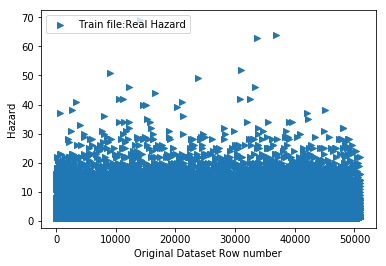

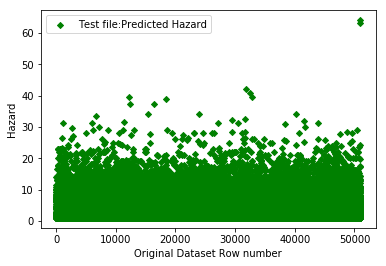

In [10]:
import matplotlib.pyplot as plt
import numpy as np

X = list(train_features.index) #Get the list of the row numbers 

# Random Forest graph
plt.scatter(X, train_labels, label="Train file:Real Hazard", marker=">")
plt.xlabel("Original Dataset Row number")
plt.ylabel("Hazard")
plt.legend(loc='upper left')
plt.show()



X2 = list(test_features.index) #Get the list of the row numbers 

plt.scatter(X2, rf_predictions, color='green', label="Test file:Predicted Hazard", marker=(4, 0))
plt.xlabel("Original Dataset Row number")
plt.ylabel("Hazard")
plt.legend(loc='upper left')
plt.show()
